<a href="https://colab.research.google.com/github/fitriasyira/CUTe_DLWORKSHOP/blob/main/ASSIGNMENT_1__Che_Nur_Fitri_Asyira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Find largest in Array 
def LargestArray(setnum, n):

  maxi = setnum[0]

  for i in range(n):
    if setnum[i] > maxi:
      maxi = setnum[i]
  return maxi

setnum = [10,50,34,76,65,98,42]
n = len(setnum)
Large = LargestArray(setnum,n)
print("Largest Number in given array is ", Large)

Largest Number in given array is  98


In [ ]:
#Add Matric Number at child class
class Person():
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def display(self):
    print("Name ", self.name)
    print("Age ",self.age)

  def __str__(self):
    return f"Name : {self.name}, Age : {self.age}"

class Student(Person):
  
  def __init__(self,name,age,matric):
    #super().__init__(name, age)
    Person.__init__(self,name,age)
    self.matric_num = matric



S1 = Student("Fitri", 22, 1913072)
S1.display()
print("Matric Number ",S1.matric_num)
print(" ")
S2 = Student("Renjun", 23, 1912326)
S2.display()
print("Matric Number ",S2.matric_num)

Name  Fitri
Age  22
Matric Number  1913072
 
Name  Renjun
Age  23
Matric Number  1912326


In [ ]:
#ASSIGNMENT 3
#Blur the face 
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import matplotlib.pyplot as plt
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  #blur image and its size
  blurred_img=cv2.blur(img, (20,20))
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image, creat
  for (x,y,w,h) in faces:
      mask = np.zeros((480, 640, 3), dtype=np.uint8)
      mask = cv2.rectangle(mask,(x,y),(x+w,y+h),(255,255,255),-1)
  #overlapping mask with blurred image with img as background
      out = np.where(mask==np.array([255,255,255]), blurred_img, img)
  # save image
  cv2.imwrite(filename, out)
  return filename


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


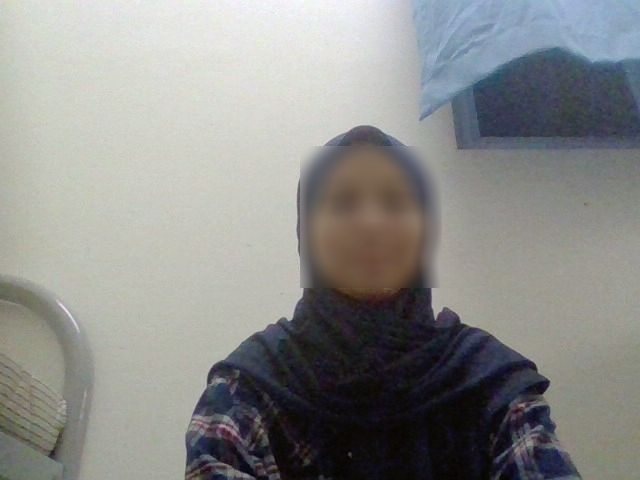

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))